<a href="https://colab.research.google.com/github/timothyel/Project-Individual/blob/main/Individual%20Project/EcomB2B_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install Library**

In [ ]:
!pip install pandasql
!pip install squarify

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=9db7c59f10e674ee240319b8c636f0679cc70018419e7e18dde010e71ba1f2c6
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.3f' % x) # 3 angka di belakang koma
pd.options.display.float_format = '{:,.2f}'.format # add thousand separator for float
import squarify
from sklearn import cluster # buat bikin cluster
from yellowbrick.cluster import SilhouetteVisualizer # model evaluation
 # preprocessing data, ngeganti value dari suatu variable
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs

#**Read Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MAY23_FSDANEXT_BELLATRIX1_TIMOTHY_LEDWINARDI/EcomB2B.csv")
df.head()

<ipython-input-4-d7a9cacc046e>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/MAY23_FSDANEXT_BELLATRIX1_TIMOTHY_LEDWINARDI/EcomB2B.csv")


,product_id,seller_id,buyer_id,buyer_provinsi,buyer_kota,po_number,transaction_date,order_address_id,order_status,rating,...,voucher_value,voucher_code,provinsi,kota,product_name,main_cat,subcategory1,subcategory2,subcategory3,brand_name
0,631abfa7cdc00cf233d552ca,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-23-251360,2021-08-23,251360,Disetujui,2.16,...,NaN,NaN,DKI JAKARTA,Jakarta Selatan,Tumblr Souvenir,Souvenir & Merchandise,NaN,NaN,NaN,NaN
1,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-12-251234,2021-08-12,251234,Penagihan,3.13,...,NaN,NaN,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN
2,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-12-16-251438,2021-12-16,251438,Dikirim,2.41,...,NaN,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN
3,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-09-09-326654,2021-09-09,326654,Dikirim,0.75,...,NaN,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN
4,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-07-08-251638,2021-07-08,251638,Tagihan Ditolak,2.38,...,NaN,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN


#**Data Manipulation**

##**Check Dtypes**

In [ ]:
if 4 + 5 == 10:
  print("TRUE")
else:
  print("FALSE")
print("TRUE")

FALSE
TRUE


In [ ]:
from sklearn.metrics import mean_squared_error

actual = [10, 30, 20, 38, 25, 11, 67, 56, 45, 43, 58, 40]
predict = [12, 37, 15, 30, 23, 8, 60, 70, 56, 55, 60, 32]

mse = mean_squared_error(actual, predict)
print("MSE:", mse)

MSE: 61.083333333333336


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183003 entries, 0 to 183002
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_id        183003 non-null  object 
 1   seller_id         183003 non-null  object 
 2   buyer_id          183003 non-null  object 
 3   buyer_provinsi    179695 non-null  object 
 4   buyer_kota        179695 non-null  object 
 5   po_number         183003 non-null  object 
 6   transaction_date  183003 non-null  object 
 7   order_address_id  183003 non-null  int64  
 8   order_status      183003 non-null  object 
 9   rating            183003 non-null  float64
 10  num_of_product    183003 non-null  int64  
 11  unit              183003 non-null  object 
 12  price_per_item    183003 non-null  int64  
 13  price_subtotal    183003 non-null  int64  
 14  shipping_cost     183003 non-null  int64  
 15  shipping_agency   183003 non-null  object 
 16  voucher_value     55

In [ ]:
df.nunique()

product_id           79149
seller_id             3496
buyer_id              6415
buyer_provinsi          34
buyer_kota             335
po_number           180920
transaction_date       364
order_address_id     67748
order_status            17
rating                 501
num_of_product         100
unit                   527
price_per_item       16528
price_subtotal       53367
shipping_cost         1806
shipping_agency         13
voucher_value           77
voucher_code             3
provinsi                35
kota                   271
product_name         69360
main_cat                41
subcategory1           206
subcategory2           330
subcategory3             0
brand_name           11612
dtype: int64

##**Missing Value**

In [ ]:
df.isna().sum()

product_id               0
seller_id                0
buyer_id                 0
buyer_provinsi        3308
buyer_kota            3308
po_number                0
transaction_date         0
order_address_id         0
order_status             0
rating                   0
num_of_product           0
unit                     0
price_per_item           0
price_subtotal           0
shipping_cost            0
shipping_agency          0
voucher_value       177498
voucher_code        181566
provinsi                 0
kota                     0
product_name             0
main_cat                 0
subcategory1         16775
subcategory2         53566
subcategory3        183003
brand_name           83610
dtype: int64

##**Fixing format**

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183003 entries, 0 to 183002
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   product_id        183003 non-null  object        
 1   seller_id         183003 non-null  object        
 2   buyer_id          183003 non-null  object        
 3   buyer_provinsi    179695 non-null  object        
 4   buyer_kota        179695 non-null  object        
 5   po_number         183003 non-null  object        
 6   transaction_date  183003 non-null  datetime64[ns]
 7   order_address_id  183003 non-null  int64         
 8   order_status      183003 non-null  object        
 9   rating            183003 non-null  float64       
 10  num_of_product    183003 non-null  int64         
 11  unit              183003 non-null  object        
 12  price_per_item    183003 non-null  int64         
 13  price_subtotal    183003 non-null  int64         
 14  ship

#**RFM Table Preparation**

##**Buyer Table**

In [ ]:
df1=df.copy()


###**Recency**

In [ ]:
df1['transaction_date'].max()

Timestamp('2021-12-30 00:00:00')

In [ ]:
df1_recency = df1.groupby('buyer_id')['transaction_date'].max().reset_index().rename({'transaction_date': 'Last_Transaction'},axis=1)
df1_recency['end_date'] = df1['transaction_date'].max()
df1_recency['end_date'] = pd.to_datetime(df1_recency['end_date'])

df1_recency['recency'] = (df1_recency['end_date'] - df1_recency['Last_Transaction']).dt.days + 1

df1_recency = df1_recency[['buyer_id','recency']]
df1_recency

,buyer_id,recency
0,631a4da47255a77e0e6d7410,15
1,631a4e307255a77e0e6d9d04,12
2,631a4f977255a77e0e6dec73,2
3,631a51497255a77e0e6eb585,2
4,631a514a7255a77e0e6eb61f,3
...,...,...
6410,631a76497476cace453f26ee,12
6411,631a764b7476cace453f27d9,25
6412,631a764b7476cace453f27e8,30
6413,631a764b7476cace453f27fb,22


###**Frequency**

In [ ]:
df1_frequency = df1.groupby('buyer_id')['po_number'].count().reset_index()
df1_frequency = df1_frequency.rename({'po_number': 'frequency'}, axis=1)
df1_frequency

,buyer_id,frequency
0,631a4da47255a77e0e6d7410,51
1,631a4e307255a77e0e6d9d04,3
2,631a4f977255a77e0e6dec73,226
3,631a51497255a77e0e6eb585,29
4,631a514a7255a77e0e6eb61f,69
...,...,...
6410,631a76497476cace453f26ee,6
6411,631a764b7476cace453f27d9,28
6412,631a764b7476cace453f27e8,10
6413,631a764b7476cace453f27fb,50


In [ ]:
df1_frequency.nunique()

buyer_id     6415
frequency     312
dtype: int64

###**Monetary**

In [ ]:
# df1_monetary1 = df1[['buyer_id','price_subtotal']]
# df1_monetary1.rename({'price_subtotal': 'monetary'}, axis =1, inplace=True)
# df1_monetary1

df1_monetary = df1.groupby('buyer_id')['price_subtotal'].sum().reset_index()
df1_monetary = df1_monetary.rename({'price_subtotal': 'monetary'}, axis=1)
df1_monetary

,buyer_id,monetary
0,631a4da47255a77e0e6d7410,1766003332
1,631a4e307255a77e0e6d9d04,4804000
2,631a4f977255a77e0e6dec73,24405958547
3,631a51497255a77e0e6eb585,67018382106
4,631a514a7255a77e0e6eb61f,6420825900
...,...,...
6410,631a76497476cace453f26ee,118650200
6411,631a764b7476cace453f27d9,3715267000
6412,631a764b7476cace453f27e8,38414500
6413,631a764b7476cace453f27fb,19077646680


###**RFM Table**

In [ ]:
rfmtb = pd.merge(df1_recency, df1_frequency, how='inner', on='buyer_id')
rfmtb = pd.merge(rfmtb, df1_monetary, how='inner', on='buyer_id')
rfmtb['buyer_id'].astype(str)
rfmtb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6415 entries, 0 to 6414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buyer_id   6415 non-null   object
 1   recency    6415 non-null   int64 
 2   frequency  6415 non-null   int64 
 3   monetary   6415 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 250.6+ KB


In [ ]:
rfmtb

,buyer_id,recency,frequency,monetary
0,631a4da47255a77e0e6d7410,15,51,1766003332
1,631a4e307255a77e0e6d9d04,12,3,4804000
2,631a4f977255a77e0e6dec73,2,226,24405958547
3,631a51497255a77e0e6eb585,2,29,67018382106
4,631a514a7255a77e0e6eb61f,3,69,6420825900
...,...,...,...,...
6410,631a76497476cace453f26ee,12,6,118650200
6411,631a764b7476cace453f27d9,25,28,3715267000
6412,631a764b7476cace453f27e8,30,10,38414500
6413,631a764b7476cace453f27fb,22,50,19077646680


##**Seller**

###**Recency**

In [ ]:
df2_recency = df1.groupby('seller_id')['transaction_date'].max().reset_index().rename({'transaction_date': 'Last_Transaction'},axis=1)
df2_recency['end_date'] = df1['transaction_date'].max()
df2_recency['end_date'] = pd.to_datetime(df2_recency['end_date'])

df2_recency['recency'] = (df2_recency['end_date'] - df2_recency['Last_Transaction']).dt.days + 1

df2_recency = df2_recency[['seller_id','recency']]
df2_recency

,seller_id,recency
0,631a506f7255a77e0e6e27e7,15
1,631a50757255a77e0e6e2f34,241
2,631a50775b9755003d24f8c4,6
3,631a50775b9755003d24f906,7
4,631a50775b9755003d24f91e,16
...,...,...
3491,631a77227476cace453fc102,11
3492,631a77227476cace453fc11f,5
3493,631a77257476cace453fc1ee,36
3494,631a77287476cace453fc2fe,74


###**Frequency**

In [ ]:
df2_frequency = df1.groupby('seller_id')['po_number'].count().reset_index()
df2_frequency = df2_frequency.rename({'po_number': 'frequency'}, axis=1)
df2_frequency

,seller_id,frequency
0,631a506f7255a77e0e6e27e7,10
1,631a50757255a77e0e6e2f34,1
2,631a50775b9755003d24f8c4,93
3,631a50775b9755003d24f906,28
4,631a50775b9755003d24f91e,8
...,...,...
3491,631a77227476cace453fc102,117
3492,631a77227476cace453fc11f,25
3493,631a77257476cace453fc1ee,2
3494,631a77287476cace453fc2fe,3


###**Monetary**

In [ ]:
# df2_monetary = df1[['seller_id','price_subtotal']]
# df2_monetary.rename({'price_subtotal': 'monetary'}, axis =1, inplace=True)
# df2_monetary

df2_monetary = df1.groupby('seller_id')['price_subtotal'].sum().reset_index()
df2_monetary = df2_monetary.rename({'price_subtotal': 'monetary'}, axis=1)
df2_monetary

,seller_id,monetary
0,631a506f7255a77e0e6e27e7,13714900800
1,631a50757255a77e0e6e2f34,420000
2,631a50775b9755003d24f8c4,23003267550
3,631a50775b9755003d24f906,40088475200
4,631a50775b9755003d24f91e,58504556000
...,...,...
3491,631a77227476cace453fc102,423451250
3492,631a77227476cace453fc11f,469444355
3493,631a77257476cace453fc1ee,108919000
3494,631a77287476cace453fc2fe,2457901000


###**RFM Table**

In [ ]:
rfmtb1 = pd.merge(df2_recency, df2_frequency, how='inner', on='seller_id')
rfmtb1 = pd.merge(rfmtb1, df2_monetary, how='inner', on='seller_id')
rfmtb1['seller_id'].astype(str)
rfmtb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seller_id  3496 non-null   object
 1   recency    3496 non-null   int64 
 2   frequency  3496 non-null   int64 
 3   monetary   3496 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 136.6+ KB


#**Check Outlier - Buyer**

In [ ]:
numerical_column = ['recency', 'frequency', 'monetary']
for i, j in enumerate(numerical_column):
  # ambil data yang ada di kolom ke j, buat boxplot-nya, kemudian taro di subplot i
  print(i,j)

0 recency
1 frequency
2 monetary


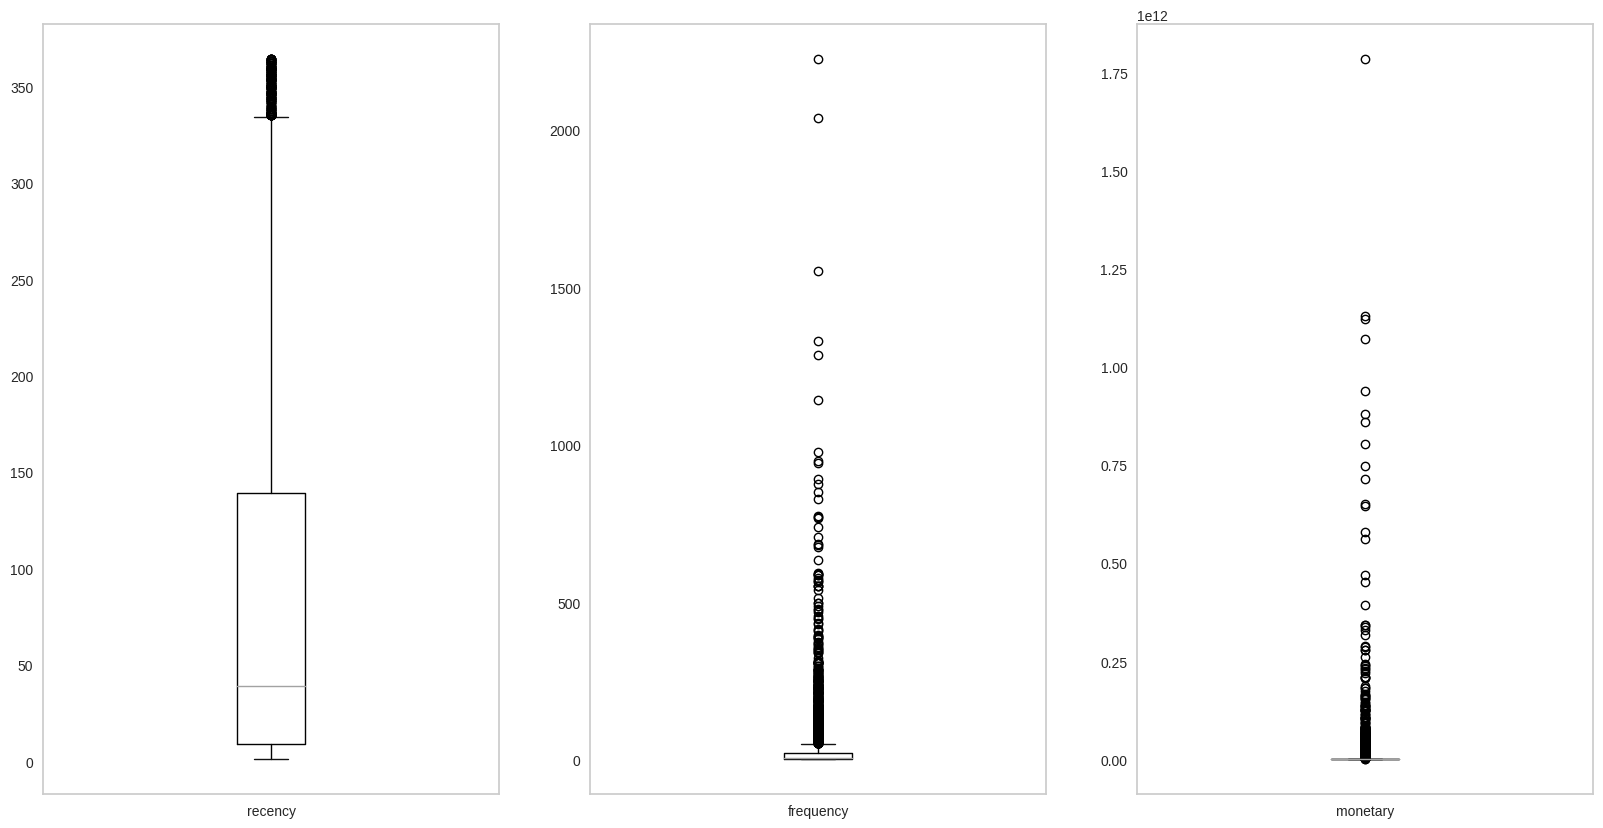

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = rfmtb.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
#Check the Q1,Q3,IQR,UB & LB

print('Outlier Detection "recency - buyer":\n')
rcb_Q1 = rfmtb["recency"].quantile(0.25)
print("Q1 =",rcb_Q1)

rcb_Q3 = rfmtb["recency"].quantile(0.75)
print("Q3 =",rcb_Q3)

rcb_IQR = rcb_Q3 - rcb_Q1
print("IQR =",rcb_IQR)

rcb_LB = rcb_Q1-1.5*rcb_IQR
print("LB =",rcb_LB)

rcb_UB = rcb_Q3+1.5*rcb_IQR
print("UB =",rcb_UB)

Outlier Detection "recency - buyer":

Q1 = 9.0
Q3 = 139.0
IQR = 130.0
LB = -186.0
UB = 334.0


In [ ]:
outlier = rfmtb[((rfmtb['recency'] > 0) & (rfmtb['recency'] > 334))]
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 35 to 6220
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buyer_id   159 non-null    object
 1   recency    159 non-null    int64 
 2   frequency  159 non-null    int64 
 3   monetary   159 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ KB


In [ ]:
print('The amount of initial data: ', len(rfmtb))
print('Number of outliers: ',len(outlier))
print('Percentage of outliers: ', round(len(outlier)/len(rfmtb)*100,2), '%')

The amount of initial data:  6415
Number of outliers:  159
Percentage of outliers:  2.48 %


In [ ]:
rfmtbcl = rfmtb[~((rfmtb['recency'] > 0) & (rfmtb['recency'] >334))]

,buyer_id,recency,frequency,monetary
0,631a4da47255a77e0e6d7410,15,51,1766003332
1,631a4e307255a77e0e6d9d04,12,3,4804000
2,631a4f977255a77e0e6dec73,2,226,24405958547
3,631a51497255a77e0e6eb585,2,29,67018382106
4,631a514a7255a77e0e6eb61f,3,69,6420825900
...,...,...,...,...
6410,631a76497476cace453f26ee,12,6,118650200
6411,631a764b7476cace453f27d9,25,28,3715267000
6412,631a764b7476cace453f27e8,30,10,38414500
6413,631a764b7476cace453f27fb,22,50,19077646680


In [ ]:
rfmtbcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6256 entries, 0 to 6414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buyer_id   6256 non-null   object
 1   recency    6256 non-null   int64 
 2   frequency  6256 non-null   int64 
 3   monetary   6256 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 244.4+ KB


#**Check Outlier - Seller**

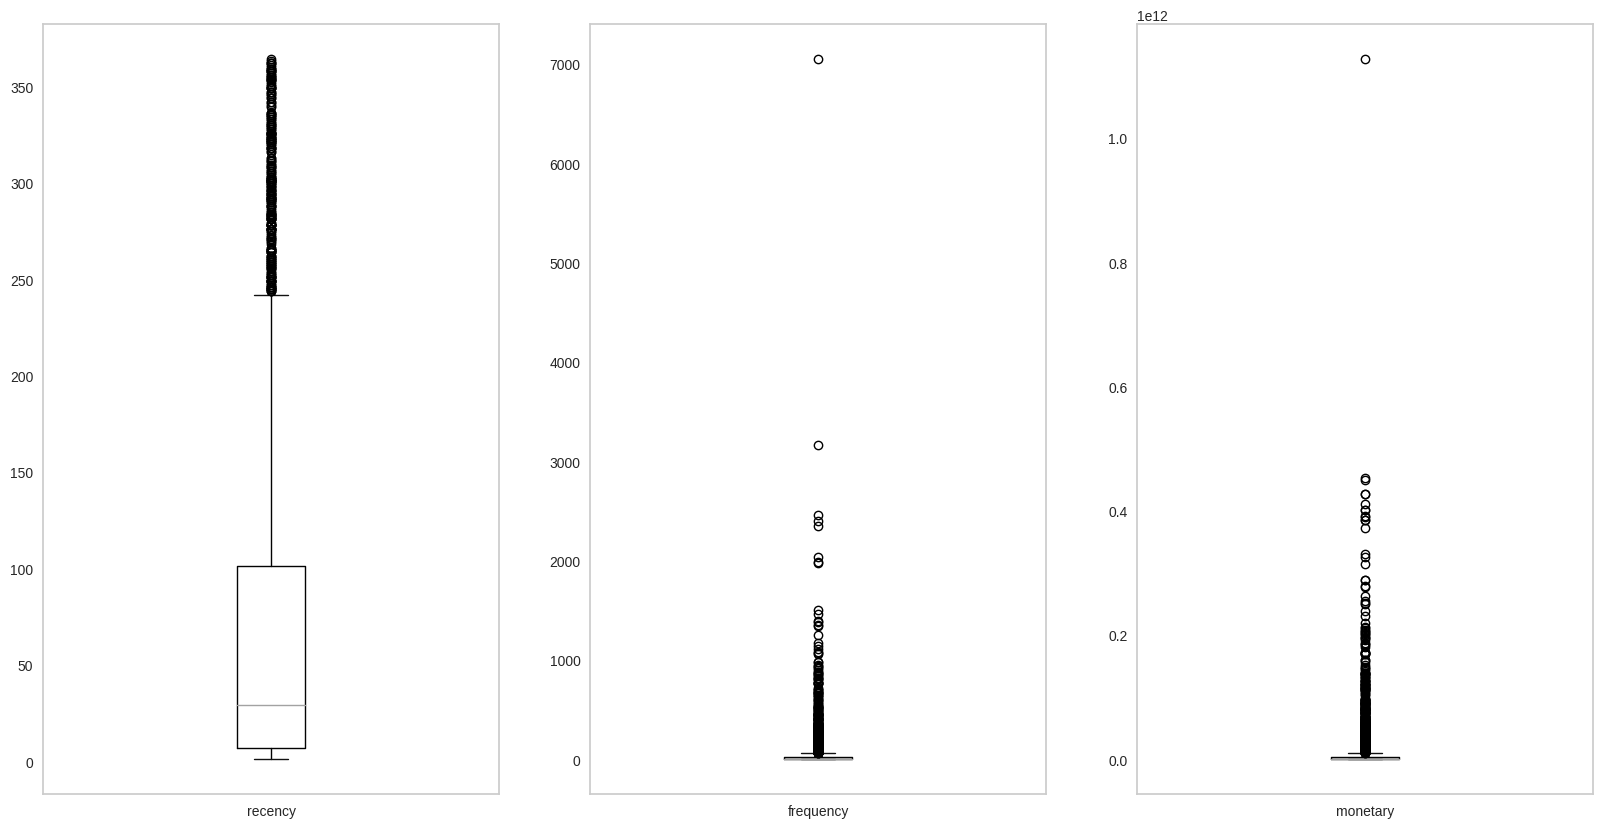

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = rfmtb1.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
#Check the Q1,Q3,IQR,UB & LB

print('Outlier Detection "recency - seller":\n')
rcb1_Q1 = rfmtb1["recency"].quantile(0.25)
print("Q1 =",rcb1_Q1)

rcb1_Q3 = rfmtb1["recency"].quantile(0.75)
print("Q3 =",rcb1_Q3)

rcb1_IQR = rcb1_Q3 - rcb1_Q1
print("IQR =",rcb1_IQR)

rcb1_LB = rcb1_Q1-1.5*rcb1_IQR
print("LB =",rcb1_LB)

rcb1_UB = rcb1_Q3+1.5*rcb1_IQR
print("UB =",rcb1_UB)

Outlier Detection "recency - seller":

Q1 = 7.0
Q3 = 101.0
IQR = 94.0
LB = -134.0
UB = 242.0


In [ ]:
outlier1 = rfmtb1[((rfmtb1['recency'] > 0) & (rfmtb1['recency'] > 242))]
outlier1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 15 to 3495
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seller_id  274 non-null    object
 1   recency    274 non-null    int64 
 2   frequency  274 non-null    int64 
 3   monetary   274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.7+ KB


In [ ]:
print('The amount of initial data: ', len(rfmtb1))
print('Number of outliers: ',len(outlier1))
print('Percentage of outliers: ', round(len(outlier)/len(rfmtb)*100,2), '%')

The amount of initial data:  3496
Number of outliers:  274
Percentage of outliers:  2.48 %


In [ ]:
outlier1 = rfmtb1[((rfmtb1['recency'] > 0) & (rfmtb1['recency'] > 242))]
outlier1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 15 to 3495
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seller_id  274 non-null    object
 1   recency    274 non-null    int64 
 2   frequency  274 non-null    int64 
 3   monetary   274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.7+ KB


In [ ]:
rfmtbcl1 = rfmtb1[~((rfmtb1['recency'] > 0) & (rfmtb1['recency'] >242))]
rfmtbcl1

,seller_id,recency,frequency,monetary
0,631a506f7255a77e0e6e27e7,15,10,13714900800
1,631a50757255a77e0e6e2f34,241,1,420000
2,631a50775b9755003d24f8c4,6,93,23003267550
3,631a50775b9755003d24f906,7,28,40088475200
4,631a50775b9755003d24f91e,16,8,58504556000
...,...,...,...,...
3490,631a77227476cace453fc0dc,134,7,1610965200
3491,631a77227476cace453fc102,11,117,423451250
3492,631a77227476cace453fc11f,5,25,469444355
3493,631a77257476cace453fc1ee,36,2,108919000


In [ ]:
rfmtbcl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seller_id  3222 non-null   object
 1   recency    3222 non-null   int64 
 2   frequency  3222 non-null   int64 
 3   monetary   3222 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 125.9+ KB


#**RFM Scoring**

##**Buyer**



In [ ]:
rfmtbcl_score = rfmtbcl.copy()

In [ ]:
ss_df = rfmtbcl.copy()
column = ['recency','frequency', 'monetary']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_df[column] = ss_scaler.fit_transform(ss_df[column])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

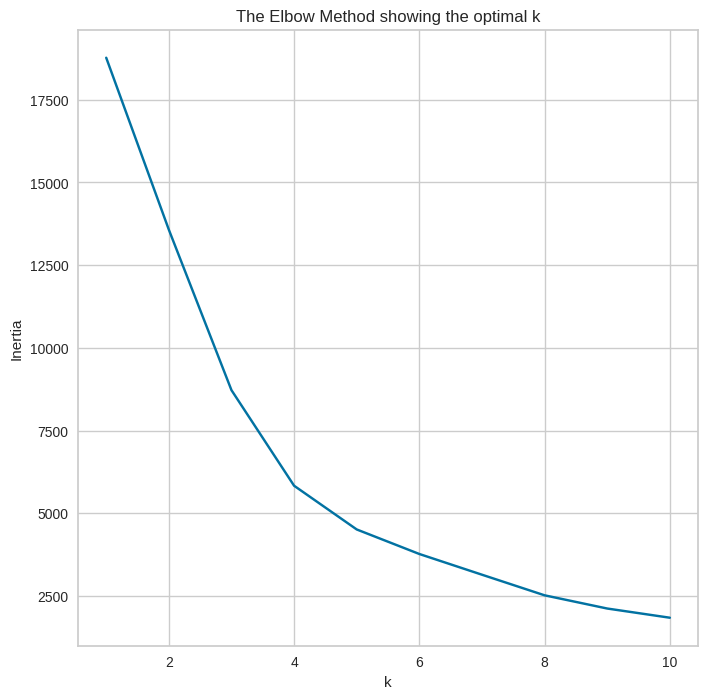

[18767.999999999993, 13571.766187404759, 8723.25026677786, 5835.187498696508, 4513.914259257691, 3772.464829762451, 3146.5810606781047, 2523.820424161595, 2124.6829484852615, 1846.763820990029]


In [ ]:
#code from faculty
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_df[['recency','frequency','monetary']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

we will use 4 clusters based on the KMeans clustering

In [ ]:
df_cluster = ss_df.copy()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6256 entries, 0 to 6414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   buyer_id   6256 non-null   object 
 1   recency    6256 non-null   float64
 2   frequency  6256 non-null   float64
 3   monetary   6256 non-null   float64
dtypes: float64(3), object(1)
memory usage: 244.4+ KB


In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster[column])
cluster_label = cluster_model.labels_
ss_df['cluster'] = cluster_label+1
ss_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,buyer_id,recency,frequency,monetary,cluster
0,631a4da47255a77e0e6d7410,-0.70,0.25,-0.09,1
1,631a4e307255a77e0e6d9d04,-0.73,-0.31,-0.13,1
2,631a4f977255a77e0e6dec73,-0.84,2.30,0.36,1
3,631a51497255a77e0e6eb585,-0.84,-0.00,1.22,1
4,631a514a7255a77e0e6eb61f,-0.83,0.46,0.00,1
...,...,...,...,...,...
6410,631a76497476cace453f26ee,-0.73,-0.27,-0.13,1
6411,631a764b7476cace453f27d9,-0.59,-0.01,-0.05,1
6412,631a764b7476cace453f27e8,-0.54,-0.22,-0.13,1
6413,631a764b7476cace453f27fb,-0.62,0.24,0.25,1


In [ ]:
rfmtbcl['cluster'] = cluster_label+1
rfmtbcl

<ipython-input-68-e1ad60e384b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmtbcl['cluster'] = cluster_label+1


,buyer_id,recency,frequency,monetary,cluster
0,631a4da47255a77e0e6d7410,15,51,1766003332,1
1,631a4e307255a77e0e6d9d04,12,3,4804000,1
2,631a4f977255a77e0e6dec73,2,226,24405958547,1
3,631a51497255a77e0e6eb585,2,29,67018382106,1
4,631a514a7255a77e0e6eb61f,3,69,6420825900,1
...,...,...,...,...,...
6410,631a76497476cace453f26ee,12,6,118650200,1
6411,631a764b7476cace453f27d9,25,28,3715267000,1
6412,631a764b7476cace453f27e8,30,10,38414500,1
6413,631a764b7476cace453f27fb,22,50,19077646680,1


In [ ]:
rfmtbcl.groupby('cluster').mean()

<ipython-input-70-02b9dba01ca1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfmtbcl.groupby('cluster').mean()


,recency,frequency,monetary
cluster,,,
1,31.55,29.74,"5,116,563,710.52"
2,216.65,1.62,"211,216,029.42"
3,1.34,629.48,"55,596,582,432.19"
4,5.07,300.07,"863,462,666,082.73"


In [ ]:
# ss_df.groupby('cluster').mean()
rfmtbcl.groupby('cluster').median()

<ipython-input-72-bd63df05f532>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfmtbcl.groupby('cluster').median()


,recency,frequency,monetary
cluster,,,
1,19.00,11.00,"145,960,950.00"
2,207.00,1.00,"2,700,000.00"
3,1.00,544.50,"19,499,366,988.50"
4,2.00,140.00,"803,977,589,484.00"


Cluster 1: "Swift Buyers"
Description: Active and frequent buyers with moderate spending.

Cluster 2: "Savvy Spenders"
Description: Smart shoppers who make strategic purchases.

Cluster 3: "Lost Opportunities"
Description: Potentially inactive customers with low engagement.

Cluster 4: "High Rollers"
Description: Highly active and big-spending customers.

In [ ]:
# ss_df.info()
rfmtb.info()

###**Cluster Labelling**

In [ ]:
# # # ss_df['cluster'] = ss_df['cluster'].astype(str)
# rfmtb['cluster'] = rfmtb['cluster'].astype(str)

# replacements = {
#     '1': 'Cluster A',
#     '2': 'Cluster B',
#     '3': 'Cluster C',
#     '4': 'Cluster D'
# }

# # Replace values in cluster using the dictionary - chatgpt
# rfmtb['cluster'] = rfmtb['cluster'].replace(replacements)
# rfmtb

In [ ]:
cs = rfmtbcl.copy()
cs = cs[['buyer_id','cluster']]
cs

,buyer_id,cluster
0,631a4da47255a77e0e6d7410,1
1,631a4e307255a77e0e6d9d04,1
2,631a4f977255a77e0e6dec73,1
3,631a51497255a77e0e6eb585,1
4,631a514a7255a77e0e6eb61f,1
...,...,...
6410,631a76497476cace453f26ee,1
6411,631a764b7476cace453f27d9,1
6412,631a764b7476cace453f27e8,1
6413,631a764b7476cace453f27fb,1


###Count Cluster

In [ ]:
cs.groupby('cluster')['buyer_id'].agg(['count'])

,count
cluster,
1,4554
2,1623
3,64
4,15


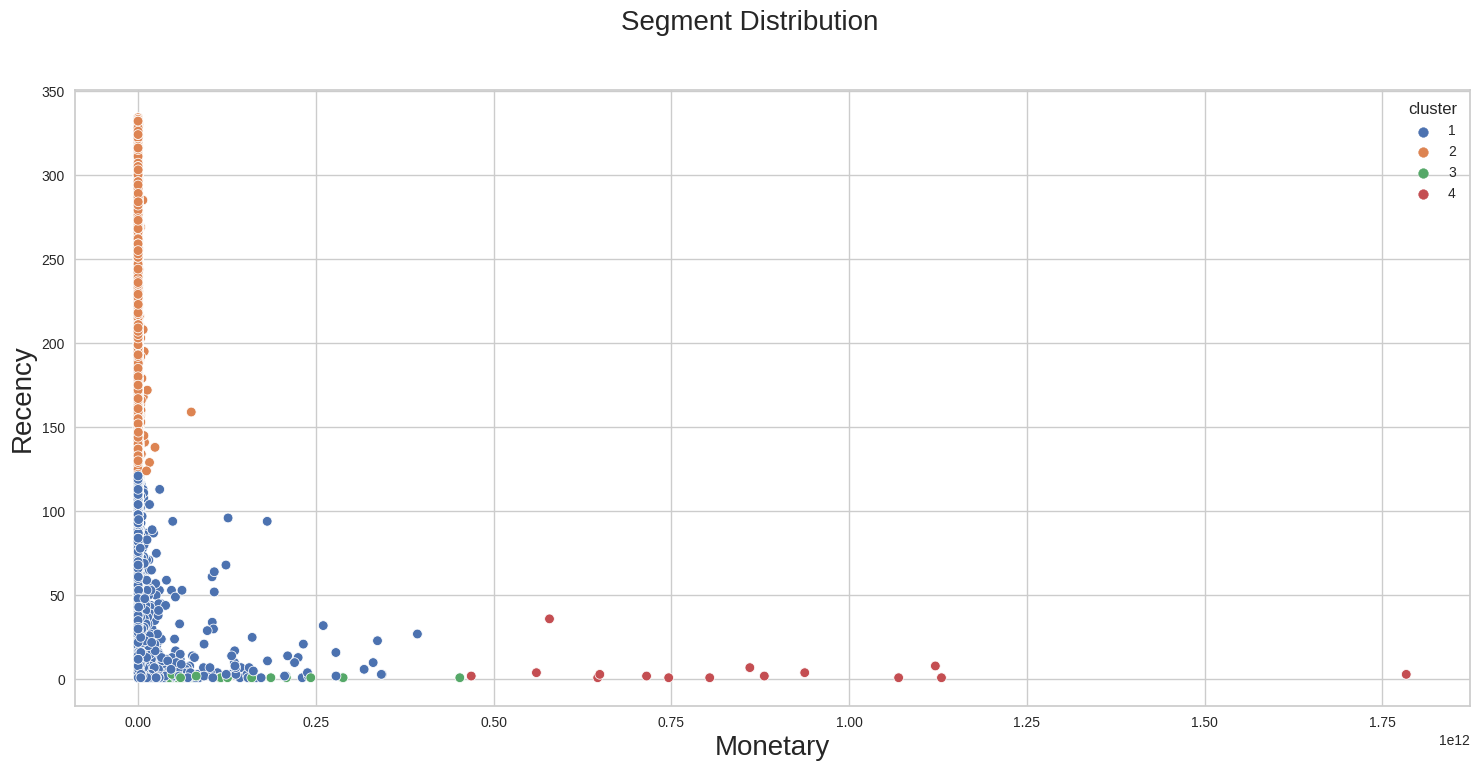

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Recency', fontsize=20)
sns.scatterplot(data=rfmtbcl, x="monetary", y="recency", hue="cluster", palette="deep")
plt.show()

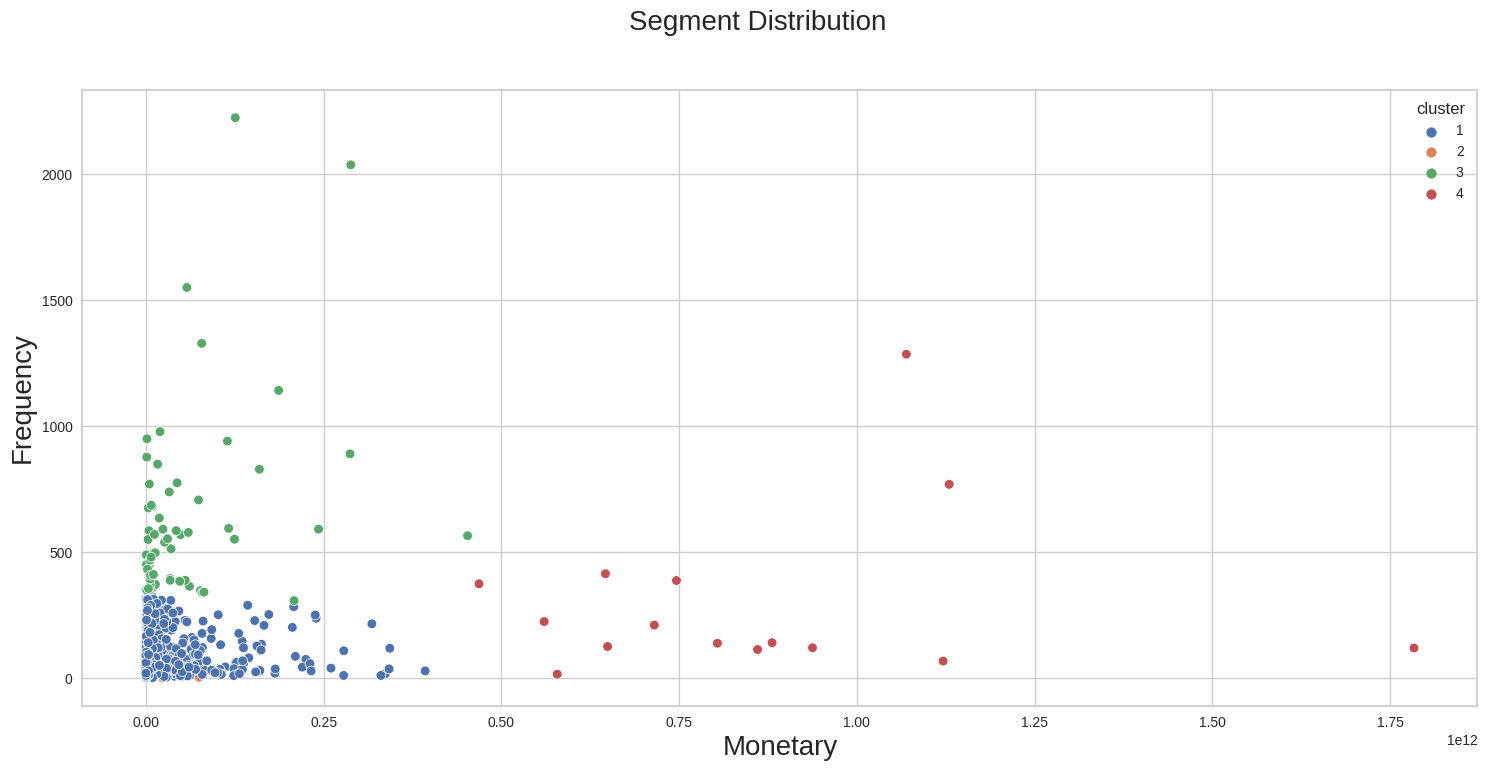

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
sns.scatterplot(data=rfmtbcl, x="monetary", y="frequency", hue="cluster", palette="deep")
plt.show()

##**Seller**



In [ ]:
rfmtb1_score = rfmtbcl1.copy()

In [ ]:
ss_df1 = rfmtbcl1.copy()
column = ['recency','frequency', 'monetary']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_df1[column] = ss_scaler.fit_transform(ss_df1[column])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

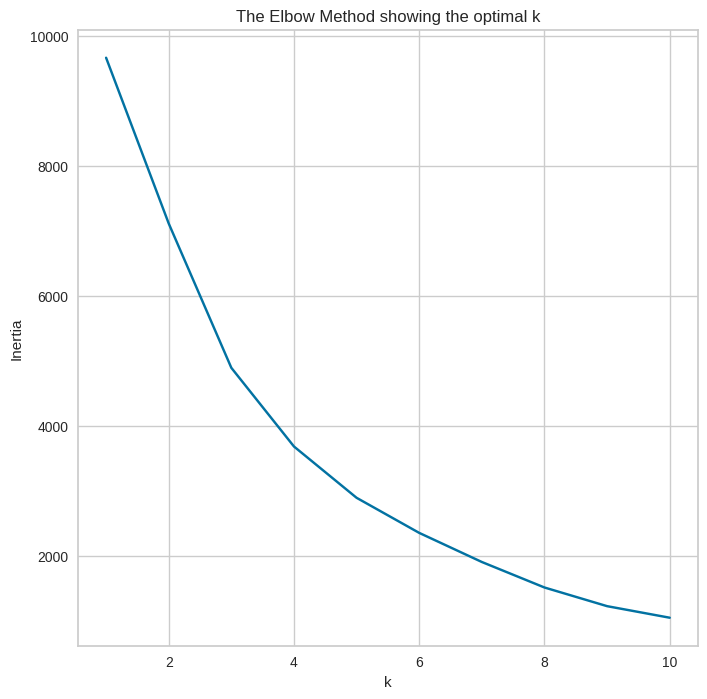

[9665.999999999993, 7115.476924076101, 4894.306849559482, 3683.7021695259173, 2894.1659755375745, 2354.251790771854, 1906.470850291033, 1513.959514830411, 1226.704924107097, 1048.8400819794006]


In [ ]:
#code from faculty
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_df1[['recency','frequency','monetary']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

we will use 4 clusters based on the KMeans clustering

In [ ]:
df_cluster1 = ss_df1.copy()
df_cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seller_id  3222 non-null   object 
 1   recency    3222 non-null   float64
 2   frequency  3222 non-null   float64
 3   monetary   3222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 125.9+ KB


In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster1[column])
cluster_label = cluster_model.labels_
rfmtbcl1['cluster'] = cluster_label+1
rfmtbcl1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-85-e2d2138b07cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmtbcl1['cluster'] = cluster_label+1


,seller_id,recency,frequency,monetary,cluster
0,631a506f7255a77e0e6e27e7,15,10,13714900800,1
1,631a50757255a77e0e6e2f34,241,1,420000,3
2,631a50775b9755003d24f8c4,6,93,23003267550,1
3,631a50775b9755003d24f906,7,28,40088475200,1
4,631a50775b9755003d24f91e,16,8,58504556000,1
...,...,...,...,...,...
3490,631a77227476cace453fc0dc,134,7,1610965200,3
3491,631a77227476cace453fc102,11,117,423451250,1
3492,631a77227476cace453fc11f,5,25,469444355,1
3493,631a77257476cace453fc1ee,36,2,108919000,1


In [ ]:
rfmtbcl1.groupby('cluster').mean()

<ipython-input-87-f384597ff53d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfmtbcl1.groupby('cluster').mean()


,recency,frequency,monetary
cluster,,,
1,23.79,45.67,"7,987,530,897.73"
2,19.12,132.85,"253,482,684,148.98"
3,152.73,2.58,"3,520,380,191.67"
4,1.10,"1,254.18","55,373,671,335.66"


In [ ]:
# ss_df.groupby('cluster').mean()
rfmtbcl1.groupby('cluster').median()

<ipython-input-89-4d2a7c3ea773>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfmtbcl1.groupby('cluster').median()


,recency,frequency,monetary
cluster,,,
1,15.00,13.00,"651,310,000.00"
2,6.00,26.00,"203,065,035,416.00"
3,146.00,2.00,"49,847,800.00"
4,1.00,922.50,"20,253,772,720.00"


Cluster 3: Rising Pioneers

Description: Sellers with recent activity and promising revenue potential, paving the way for future success.

Cluster 1: Steadfast Merchants

Description: Seasoned sellers with consistent activity, contributing significantly to the platform's revenue and building trust.

Cluster 4: Agile Traders

Description: Highly active sellers but quite passive in doing transactions.

Cluster 4: Premier Performers

Description: Seller with exceptional recent sales, and moderate revenue

In [ ]:
# ss_df.groupby('cluster').mean()
rfmtbcl1.groupby('cluster').min()

,seller_id,recency,frequency,monetary
cluster,,,,
1,631a506f7255a77e0e6e27e7,1,1,33000
2,631a50775b9755003d24f92a,1,2,130729396330
3,631a50757255a77e0e6e2f34,88,1,5160
4,631a507f7255a77e0e6e3834,1,645,150778000


In [ ]:
# ss_df.groupby('cluster').mean()
rfmtbcl1.groupby('cluster').min()

,seller_id,recency,frequency,monetary
cluster,,,,
1,631a506f7255a77e0e6e27e7,1,1,33000
2,631a50775b9755003d24f92a,1,2,130729396330
3,631a50757255a77e0e6e2f34,88,1,5160
4,631a507f7255a77e0e6e3834,1,645,150778000


In [ ]:
# ss_df.groupby('cluster').mean()
rfmtbcl1.groupby('cluster').mean()

<ipython-input-92-e1f3de8b6bc4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfmtbcl1.groupby('cluster').mean()


,recency,frequency,monetary
cluster,,,
1,23.79,45.67,"7,987,530,897.73"
2,19.12,132.85,"253,482,684,148.98"
3,152.73,2.58,"3,520,380,191.67"
4,1.10,"1,254.18","55,373,671,335.66"


In [ ]:
# ss_df.info()
rfmtbcl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3494
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seller_id  3222 non-null   object
 1   recency    3222 non-null   int64 
 2   frequency  3222 non-null   int64 
 3   monetary   3222 non-null   int64 
 4   cluster    3222 non-null   int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 138.4+ KB


###**Cluster Labelling**

In [ ]:
# ss_df['cluster'] = ss_df['cluster'].astype(str)
# rfmtb1['cluster'] = rfmtb1['cluster'].astype(str)

# replacements = {
#     '1': 'Rising Pioneers',
#     '2': 'Steadfast Merchant',
#     '3': 'Agile Traders',
#     '4': 'Premiere Achiever'
# }

# # Replace values in cluster using the dictionary - chatgpt
# rfmtb1['cluster'] = rfmtb1['cluster'].replace(replacements)

In [ ]:
# ss_df['cluster'].unique()
rfmtb1['cluster'].unique()

In [ ]:
cs1 = rfmtbcl1.copy()
cs1 = cs1[['seller_id','cluster']]
cs1.rename(columns={'cluster': 'clustersell'}, inplace=True)
cs1

,seller_id,clustersell
0,631a506f7255a77e0e6e27e7,1
1,631a50757255a77e0e6e2f34,3
2,631a50775b9755003d24f8c4,1
3,631a50775b9755003d24f906,1
4,631a50775b9755003d24f91e,1
...,...,...
3490,631a77227476cace453fc0dc,3
3491,631a77227476cace453fc102,1
3492,631a77227476cace453fc11f,1
3493,631a77257476cace453fc1ee,1


###Cluster count

In [ ]:
cs1.groupby('clustersell')['seller_id'].agg(['count'])

,count
clustersell,
1,2415
2,59
3,698
4,50


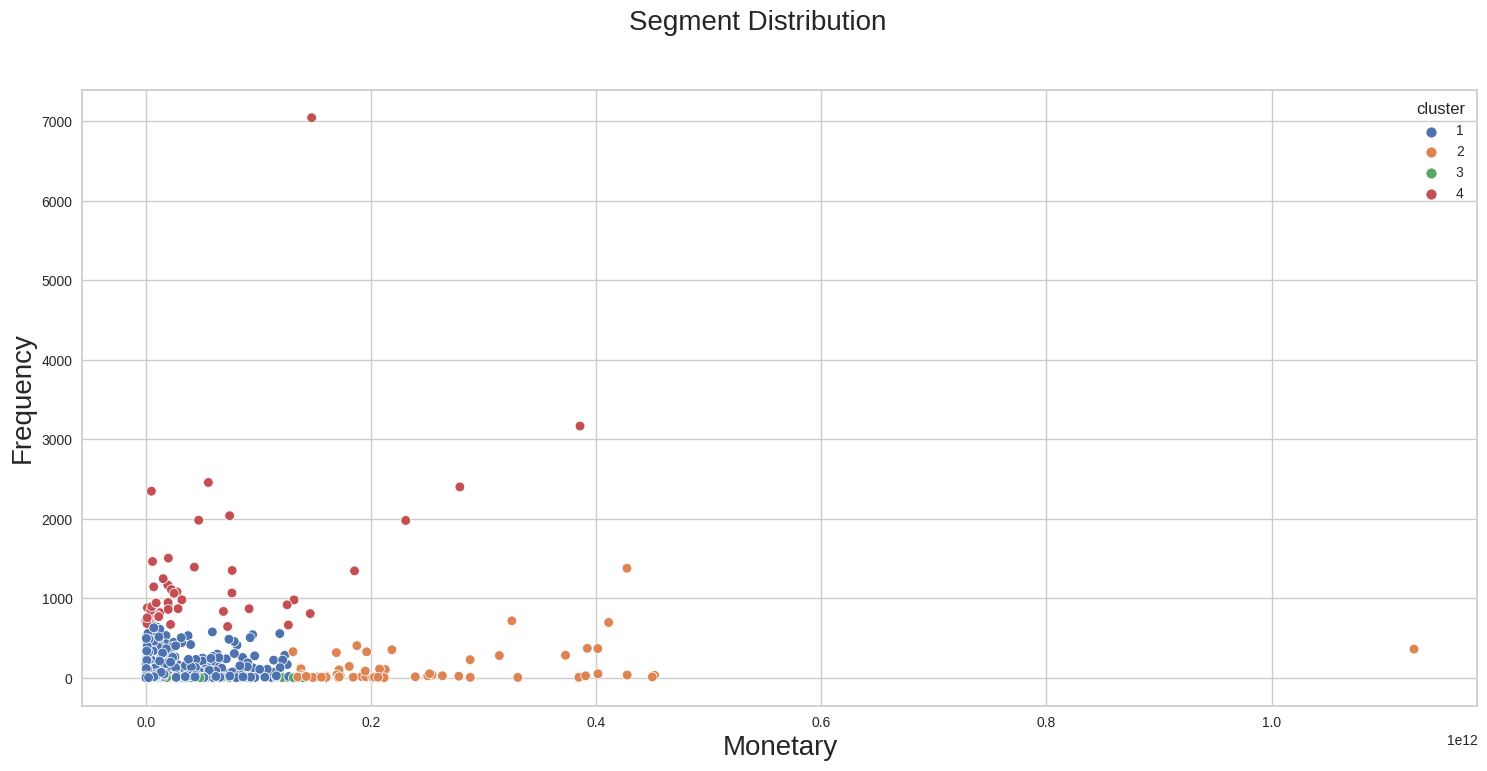

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
sns.scatterplot(data=rfmtbcl1, x="monetary", y="frequency", hue="cluster", palette="deep")
plt.show()

#**Merging Label to dataframe**



###**Buyer**

In [ ]:
fix_table = pd.merge(df1, cs, on='buyer_id', how='inner')
fix_table

,product_id,seller_id,buyer_id,buyer_provinsi,buyer_kota,po_number,transaction_date,order_address_id,order_status,rating,...,voucher_code,provinsi,kota,product_name,main_cat,subcategory1,subcategory2,subcategory3,brand_name,cluster
0,631abfa7cdc00cf233d552ca,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-23-251360,2021-08-23,251360,Disetujui,2.16,...,NaN,DKI JAKARTA,Jakarta Selatan,Tumblr Souvenir,Souvenir & Merchandise,NaN,NaN,NaN,NaN,1
1,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-12-251234,2021-08-12,251234,Penagihan,3.13,...,NaN,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN,1
2,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-12-16-251438,2021-12-16,251438,Dikirim,2.41,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
3,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-09-09-326654,2021-09-09,326654,Dikirim,0.75,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
4,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-07-08-251638,2021-07-08,251638,Tagihan Ditolak,2.38,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182834,631d5335e68bbb0b8d659840,631a569a7255a77e0e70320b,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-04-06-315659,2021-04-06,315659,Selesai,0.59,...,NaN,JAWA TIMUR,Kota Batu,Flashdisk Sandisk OTG 32GB Ultra Dual Drive US...,Komputer & Laptop,Media Penyimpanan Data,USB Flash Disk,NaN,Sandisk,1
182835,631d5b97459015fcda6ada9d,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-12-06-55311,2021-12-06,55311,Selesai,0.84,...,NaN,DKI JAKARTA,Jakarta Utara,Tinta Epson 664 Black,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1
182836,631d5b97459015fcda6adaaa,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-01-15-55311,2021-01-15,55311,Selesai,2.09,...,NaN,DKI JAKARTA,Jakarta Utara,Tinta Epson 664 Magenta,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1
182837,631d5b97459015fcda6adaac,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-06-29-55311,2021-06-29,55311,Selesai,2.54,...,NaN,DKI JAKARTA,Jakarta Utara,TINTA EPSON 664 CYAN,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1


In [ ]:
fix_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182839 entries, 0 to 182838
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   product_id        182839 non-null  object        
 1   seller_id         182839 non-null  object        
 2   buyer_id          182839 non-null  object        
 3   buyer_provinsi    179626 non-null  object        
 4   buyer_kota        179626 non-null  object        
 5   po_number         182839 non-null  object        
 6   transaction_date  182839 non-null  datetime64[ns]
 7   order_address_id  182839 non-null  int64         
 8   order_status      182839 non-null  object        
 9   rating            182839 non-null  float64       
 10  num_of_product    182839 non-null  int64         
 11  unit              182839 non-null  object        
 12  price_per_item    182839 non-null  int64         
 13  price_subtotal    182839 non-null  int64         
 14  ship

In [ ]:
fix_table

,product_id,seller_id,buyer_id,buyer_provinsi,buyer_kota,po_number,transaction_date,order_address_id,order_status,rating,...,voucher_code,provinsi,kota,product_name,main_cat,subcategory1,subcategory2,subcategory3,brand_name,cluster
0,631abfa7cdc00cf233d552ca,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-23-251360,2021-08-23,251360,Disetujui,2.16,...,NaN,DKI JAKARTA,Jakarta Selatan,Tumblr Souvenir,Souvenir & Merchandise,NaN,NaN,NaN,NaN,1
1,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-12-251234,2021-08-12,251234,Penagihan,3.13,...,NaN,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN,1
2,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-12-16-251438,2021-12-16,251438,Dikirim,2.41,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
3,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-09-09-326654,2021-09-09,326654,Dikirim,0.75,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
4,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-07-08-251638,2021-07-08,251638,Tagihan Ditolak,2.38,...,NaN,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182834,631d5335e68bbb0b8d659840,631a569a7255a77e0e70320b,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-04-06-315659,2021-04-06,315659,Selesai,0.59,...,NaN,JAWA TIMUR,Kota Batu,Flashdisk Sandisk OTG 32GB Ultra Dual Drive US...,Komputer & Laptop,Media Penyimpanan Data,USB Flash Disk,NaN,Sandisk,1
182835,631d5b97459015fcda6ada9d,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-12-06-55311,2021-12-06,55311,Selesai,0.84,...,NaN,DKI JAKARTA,Jakarta Utara,Tinta Epson 664 Black,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1
182836,631d5b97459015fcda6adaaa,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-01-15-55311,2021-01-15,55311,Selesai,2.09,...,NaN,DKI JAKARTA,Jakarta Utara,Tinta Epson 664 Magenta,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1
182837,631d5b97459015fcda6adaac,631a57b77255a77e0e7093bf,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-06-29-55311,2021-06-29,55311,Selesai,2.54,...,NaN,DKI JAKARTA,Jakarta Utara,TINTA EPSON 664 CYAN,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya,NaN,Epson,1


###**Seller**

In [ ]:
fix_table = pd.merge(fix_table, cs1, on='seller_id', how='inner')
fix_table


,product_id,seller_id,buyer_id,buyer_provinsi,buyer_kota,po_number,transaction_date,order_address_id,order_status,rating,...,provinsi,kota,product_name,main_cat,subcategory1,subcategory2,subcategory3,brand_name,cluster,clustersell
0,631abfa7cdc00cf233d552ca,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-23-251360,2021-08-23,251360,Disetujui,2.16,...,DKI JAKARTA,Jakarta Selatan,Tumblr Souvenir,Souvenir & Merchandise,NaN,NaN,NaN,NaN,1,1
1,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-08-12-251234,2021-08-12,251234,Penagihan,3.13,...,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN,1,1
2,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a51677255a77e0e6ec0ba,DKI JAKARTA,Jakarta Selatan,PO-2021-11-11-298743,2021-11-11,298743,Expired,1.44,...,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN,1,1
3,631abfa7cdc00cf233d552cc,631a53a57255a77e0e6f4aa2,631a51677255a77e0e6ec0ba,DKI JAKARTA,Jakarta Selatan,PO-2021-01-14-299013,2021-01-14,299013,Expired,3.07,...,DKI JAKARTA,Jakarta Selatan,Jasa Blast Promosi,Jasa Advertising,Internet,Website,NaN,NaN,1,1
4,631b570286073948b5b6554a,631a59935b9755003d28703b,631a4da47255a77e0e6d7410,JAWA BARAT,Kota Cirebon,PO-2021-12-16-251438,2021-12-16,251438,Dikirim,2.41,...,SUMATERA UTARA,Kota Medan,[Testing] Smart LED Tumbler Custom,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182496,631d50a7459015fcda68df1f,631a57b97255a77e0e709586,631a764b7476cace453f27fb,KALIMANTAN TIMUR,Kota Bontang,PO-2021-09-29-312677,2021-09-29,312677,Selesai,2.91,...,KALIMANTAN TIMUR,Kota Bontang,CELANA,Souvenir & Merchandise,Souvenir Lainnya,NaN,NaN,marks & spencer,1,1
182497,631d50a7459015fcda68df21,631a57b97255a77e0e709586,631a764b7476cace453f27fb,KALIMANTAN TIMUR,Kota Bontang,PO-2021-11-20-386940,2021-11-20,386940,Selesai,4.15,...,KALIMANTAN TIMUR,Kota Bontang,susu bear brand,Pertanian & Peternakan,Susu,NaN,NaN,Bear Brand,1,1
182498,631d50a7459015fcda68df33,631a57b97255a77e0e709586,631a764b7476cace453f27fb,KALIMANTAN TIMUR,Kota Bontang,PO-2021-05-13-310608,2021-05-13,310608,Selesai,0.92,...,KALIMANTAN TIMUR,Kota Bontang,"Catridge Filter A & B Size 40 INC,5 Micr, Ref ...",Pertukangan,Generator & Genset,NaN,NaN,PENTAIR,1,1
182499,631b52d83fe61f0c55fd37c5,631a57b27255a77e0e708ec1,631a764c7476cace453f283c,JAWA BARAT,Kab. Sumedang,PO-2021-03-18-315676,2021-03-18,315676,Selesai,4.88,...,JAWA BARAT,Kab. Bandung Barat,Sepatu Boot AP Terra,Pertukangan,Alat Keselamatan,Safety Boots,NaN,Sepatu AP TERRA,1,3


In [ ]:
fix_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182501 entries, 0 to 182500
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   product_id        182501 non-null  object        
 1   seller_id         182501 non-null  object        
 2   buyer_id          182501 non-null  object        
 3   buyer_provinsi    179309 non-null  object        
 4   buyer_kota        179309 non-null  object        
 5   po_number         182501 non-null  object        
 6   transaction_date  182501 non-null  datetime64[ns]
 7   order_address_id  182501 non-null  int64         
 8   order_status      182501 non-null  object        
 9   rating            182501 non-null  float64       
 10  num_of_product    182501 non-null  int64         
 11  unit              182501 non-null  object        
 12  price_per_item    182501 non-null  int64         
 13  price_subtotal    182501 non-null  int64         
 14  ship

In [ ]:
dfix = fix_table.loc[:, ~fix_table.columns.duplicated()]
dfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182501 entries, 0 to 182500
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   product_id        182501 non-null  object        
 1   seller_id         182501 non-null  object        
 2   buyer_id          182501 non-null  object        
 3   buyer_provinsi    179309 non-null  object        
 4   buyer_kota        179309 non-null  object        
 5   po_number         182501 non-null  object        
 6   transaction_date  182501 non-null  datetime64[ns]
 7   order_address_id  182501 non-null  int64         
 8   order_status      182501 non-null  object        
 9   rating            182501 non-null  float64       
 10  num_of_product    182501 non-null  int64         
 11  unit              182501 non-null  object        
 12  price_per_item    182501 non-null  int64         
 13  price_subtotal    182501 non-null  int64         
 14  ship

In [ ]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182501 entries, 0 to 182500
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   product_id        182501 non-null  object        
 1   seller_id         182501 non-null  object        
 2   buyer_id          182501 non-null  object        
 3   buyer_provinsi    179309 non-null  object        
 4   buyer_kota        179309 non-null  object        
 5   po_number         182501 non-null  object        
 6   transaction_date  182501 non-null  datetime64[ns]
 7   order_address_id  182501 non-null  int64         
 8   order_status      182501 non-null  object        
 9   rating            182501 non-null  float64       
 10  num_of_product    182501 non-null  int64         
 11  unit              182501 non-null  object        
 12  price_per_item    182501 non-null  int64         
 13  price_subtotal    182501 non-null  int64         
 14  ship

In [ ]:
dfix[(dfix['seller_id'] == '631a771c7476cace453fbe9c')]

,product_id,seller_id,buyer_id,buyer_provinsi,buyer_kota,po_number,transaction_date,order_address_id,order_status,rating,...,provinsi,kota,product_name,main_cat,subcategory1,subcategory2,subcategory3,brand_name,cluster,clustersell
10151,631b357c11f5e2561e80b248,631a771c7476cace453fbe9c,631a514a7255a77e0e6eb61f,DKI JAKARTA,Jakarta Timur,PO-2021-04-28-182349,2021-04-28,182349,Selesai,3.89,...,JAWA TENGAH,KAB. KARANGANYAR,KN95 Folded Mask,Kesehatan,Masker,Masker Kesehatan,NaN,KN95 Folded Mask,1,1
10152,631b357c11f5e2561e80b305,631a771c7476cace453fbe9c,631a514d7255a77e0e6eb6e5,KALIMANTAN TIMUR,Kota Bontang,PO-2021-12-17-300303,2021-12-17,300303,Selesai,3.98,...,JAWA TENGAH,KAB. KARANGANYAR,Bolpoin Snowman BP V5 Hitam,Office & Stationery,Alat Tulis,Lainnya,NaN,Snowman,1,1
10153,631b357d11f5e2561e80b3d0,631a771c7476cace453fbe9c,631a514d7255a77e0e6eb6e5,KALIMANTAN TIMUR,Kota Bontang,PO-2021-03-30-300303,2021-03-30,300303,Selesai,2.92,...,JAWA TENGAH,KAB. KARANGANYAR,Kenko Stappler HD 10S,Office & Stationery,Alat Tulis,Lainnya,NaN,KENKO,1,1
10154,631b357d11f5e2561e80b420,631a771c7476cace453fbe9c,631a514d7255a77e0e6eb6e5,KALIMANTAN TIMUR,Kota Bontang,PO-2021-07-25-300303,2021-07-25,300303,Selesai,4.46,...,JAWA TENGAH,KAB. KARANGANYAR,Bolpoint Standard AE7 Opac Hitam/Biru/Merah,Office & Stationery,Alat Tulis,Lainnya,NaN,STANDARD,1,1
10155,631b357d11f5e2561e80b5b3,631a771c7476cace453fbe9c,631a514d7255a77e0e6eb6e5,KALIMANTAN TIMUR,Kota Bontang,PO-2021-05-04-300303,2021-05-04,300303,Selesai,1.27,...,JAWA TENGAH,KAB. KARANGANYAR,Isi Staples Max No.10,Office & Stationery,Alat Tulis,Lainnya,NaN,Max,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,631b357c11f5e2561e80b2a3,631a771c7476cace453fbe9c,631a76387476cace453f1fac,KEPULAUAN BANGKA BELITUNG,Kab. Bangka Barat,PO-2021-09-09-64879,2021-09-09,64879,Selesai,0.82,...,JAWA TENGAH,KAB. KARANGANYAR,Stand Book Benefit SB 8877,Office & Stationery,Alat Tulis,Lainnya,NaN,BENEFIT,1,1
10484,631b357c11f5e2561e80b2b6,631a771c7476cace453fbe9c,631a76387476cace453f1fac,KEPULAUAN BANGKA BELITUNG,Kab. Bangka Barat,PO-2021-05-07-64879,2021-05-07,64879,Selesai,2.57,...,JAWA TENGAH,KAB. KARANGANYAR,Tinta Printer Epson 664 Hitam Black L100 L110 ...,Office & Stationery,NaN,NaN,NaN,Epson,1,1
10485,631b357c11f5e2561e80b303,631a771c7476cace453fbe9c,631a76387476cace453f1fac,KEPULAUAN BANGKA BELITUNG,Kab. Bangka Barat,PO-2021-06-09-64879,2021-06-09,64879,Selesai,0.15,...,JAWA TENGAH,KAB. KARANGANYAR,Materai Tempel 10000,Office & Stationery,Alat Tulis,Lainnya,NaN,MATERAI 10000,1,1
10486,631b357c11f5e2561e80b380,631a771c7476cace453fbe9c,631a76387476cace453f1fac,KEPULAUAN BANGKA BELITUNG,Kab. Bangka Barat,PO-2021-12-20-64879,2021-12-20,64879,Selesai,1.78,...,JAWA TENGAH,KAB. KARANGANYAR,Business Map Jenia F4,Office & Stationery,Surat-Menyurat,Amplop,NaN,JENIA,1,1


In [ ]:
dftestt = dfix[(dfix['clustersell'] == "Agile Traders")]
dftestt['transaction_date'].max()

NaT

#**Save FIle**

In [ ]:
file_path = 'clustered_clean.csv'
fix_table.to_csv(file_path, index=False)

# Download the saved CSV file
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>